# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [89]:
## The Data
titanic_data = pd.read_csv("titanic_train.csv")

In [91]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data

<Axes: >

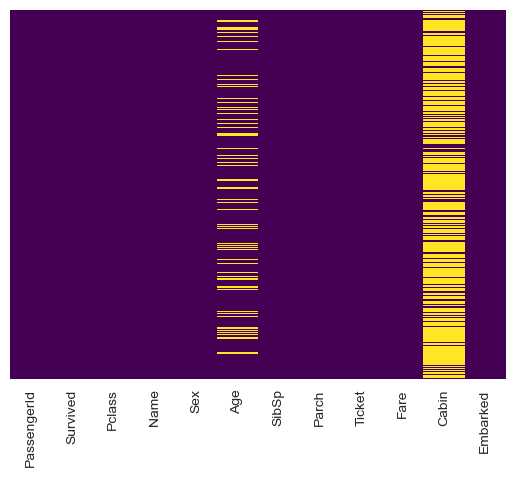

In [94]:
sns.heatmap(titanic_data.isnull(), yticklabels =False, cbar =False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_2332\3393703279.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

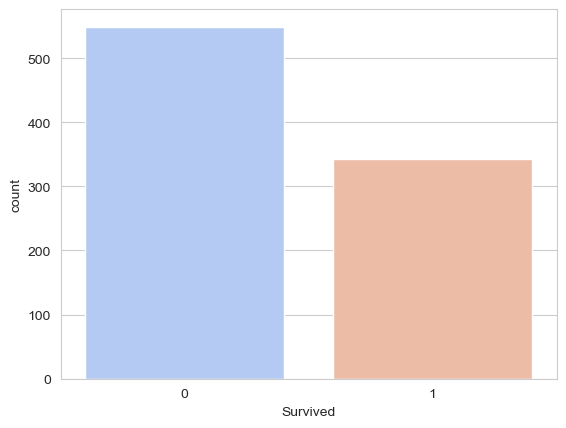

In [97]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', data=titanic_data, palette='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

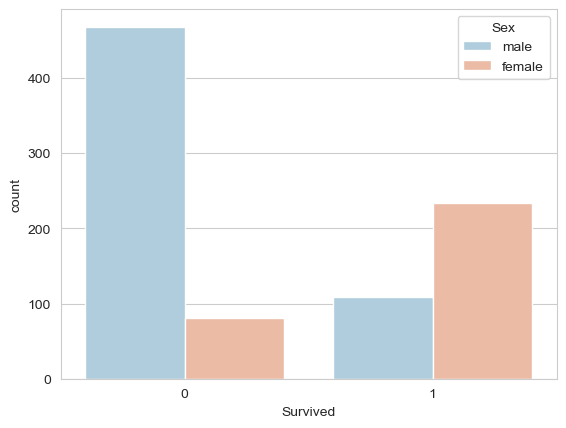

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

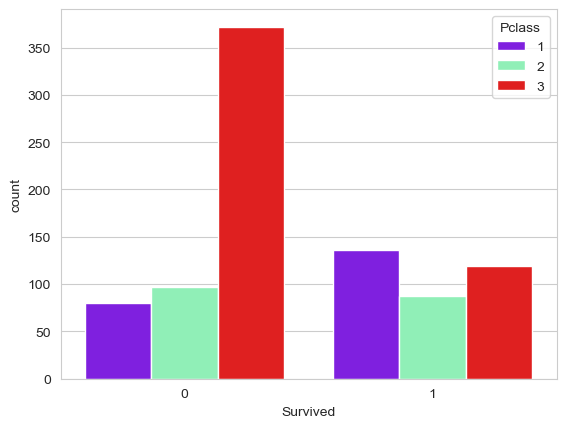

In [101]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', hue ='Pclass', data =titanic_data, palette ='rainbow')

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_2332\2354919542.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

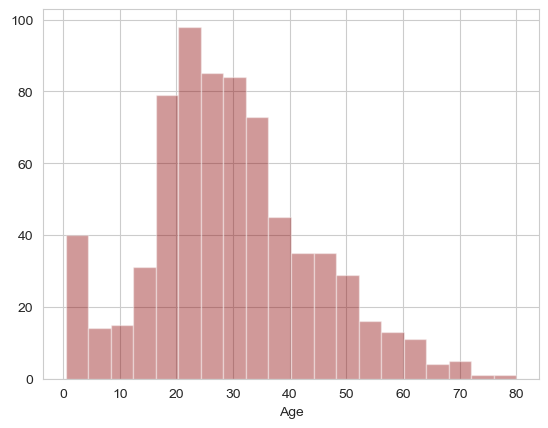

In [103]:
sns.distplot(titanic_data['Age'].dropna(), kde=False, color='darkred', bins=20)

<Axes: >

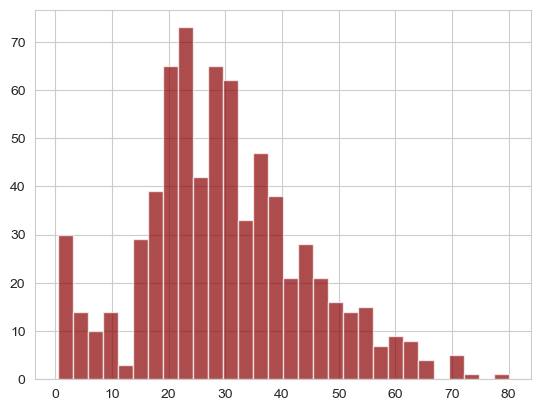

In [105]:
titanic_data['Age'].hist(bins=30, color ='darkred', alpha=0.7)

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_2332\3402327652.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='SibSp', ylabel='count'>

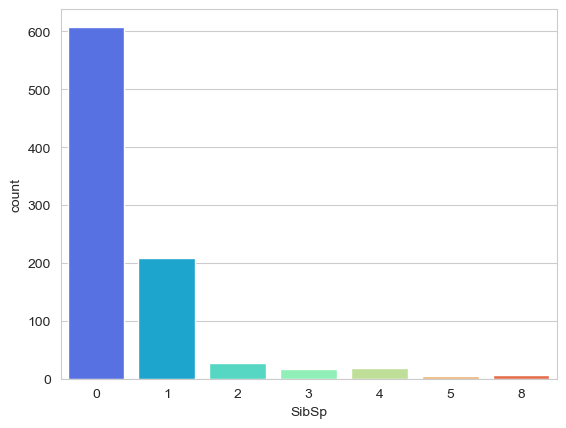

In [107]:
sns.countplot(x ='SibSp', data = titanic_data, palette ='rainbow')

<Axes: >

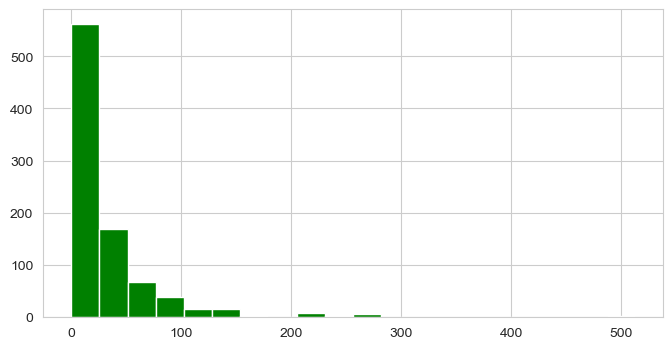

In [109]:
titanic_data['Fare'].hist(color='green', bins=20, figsize=(8,4))

## Cufflinks for Plots


In [112]:
import cufflinks as cf
cf.go_offline()

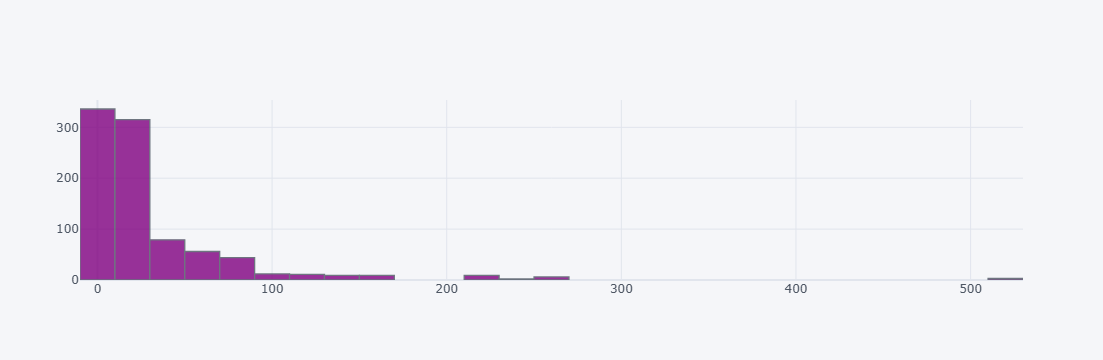

In [114]:
titanic_data['Fare'].iplot(kind ='hist', bins=30, color='purple')

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:




C:\Users\wwwmu\AppData\Local\Temp\ipykernel_2332\254864495.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

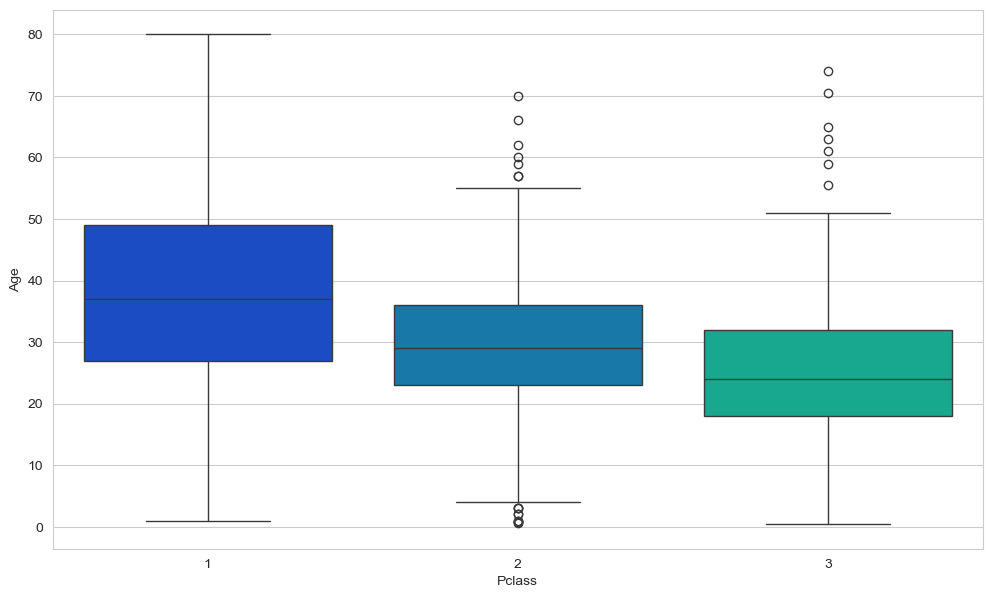

In [117]:
plt.figure(figsize =(12,7))
sns.boxplot(x ='Pclass', y ='Age', data =titanic_data, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

### Imputation

In [121]:
#Group by Pclass and calculate the mean age
mean_age_by_pclass =titanic_data.groupby('Pclass')['Age'].mean()
mean_age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [123]:
class1_avg_age =int(mean_age_by_pclass[1])
class1_avg_age

38

In [125]:
class2_avg_age =int(mean_age_by_pclass[2])
class2_avg_age

29

In [127]:
class3_avg_age =int(mean_age_by_pclass[3])
class3_avg_age

25

In [129]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return int(mean_age_by_pclass[1])
        elif Pclass == 2:
            return int(mean_age_by_pclass[2])
        else:
            return int(mean_age_by_pclass[3])
    else:
        return int(Age)

In [131]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age, axis =1)

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_2332\4154011351.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_2332\4154011351.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

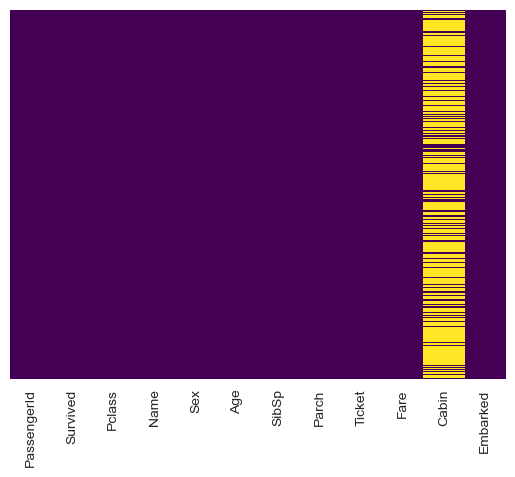

In [133]:
sns.heatmap(titanic_data.isnull(), yticklabels =False, cbar =False, cmap ='viridis')

Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [136]:
titanic_data.drop('Cabin', axis =1, inplace =True)

In [138]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [140]:
titanic_data.dropna(inplace =True)

### Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [143]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


## Making dummy values

In [146]:
#for sex column
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)
sex =sex.astype(int)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [148]:
#for embark column
embark = pd.get_dummies(titanic_data['Embarked'], drop_first = True)
embark = embark.astype(int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [150]:
#concat these two column with titanic_data
titanic_data = pd.concat([titanic_data,sex,embark], axis=1)

In [152]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.45,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,Q,1,1,0


In [154]:
#dropping unwanted columns:

titanic_data.drop(['Sex','Name','Ticket','Embarked','PassengerId'],axis = 1, inplace =True)

In [156]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [159]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


## splitting Data

In [162]:
X = titanic_data.drop('Survived', axis =1)
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22,1,0,7.2500,1,0,1
1,1,38,1,0,71.2833,0,0,0
2,3,26,0,0,7.9250,0,0,1
3,1,35,1,0,53.1000,0,0,1
4,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1
887,1,19,0,0,30.0000,0,0,1
888,3,25,1,2,23.4500,0,0,1
889,1,26,0,0,30.0000,1,0,0


In [164]:
y= titanic_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Train Test Split

In [167]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Training and Predicting

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
logmodel = LogisticRegression()


In [176]:
logmodel.fit(X_train,y_train)

C:\Users\wwwmu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [178]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Classification report - Evaluation

We can check precision,recall,f1-score using classification report!

In [182]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       216
           1       0.78      0.68      0.73       140

    accuracy                           0.80       356
   macro avg       0.79      0.78      0.78       356
weighted avg       0.80      0.80      0.79       356



In [186]:
from sklearn.metrics import confusion_matrix

In [190]:
confusion_matrix(y_test, predictions)

array([[189,  27],
       [ 45,  95]], dtype=int64)